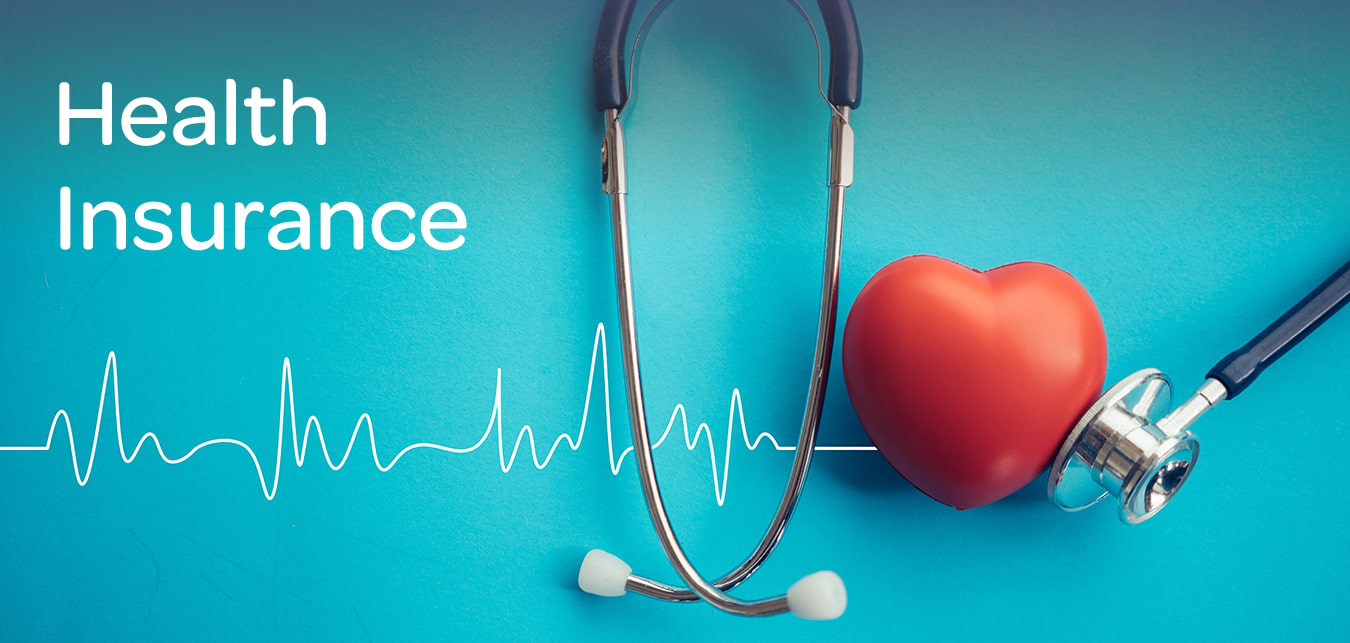

In [2]:
from PIL import Image
img = Image.open('Health.jpg')
img

   A **<span class="girk">Health Insurance</span>** company can only make money if it collects more than it spends on the medical care of its beneficiaries. On the other hand, even though some conditions are more prevalent for certain segments of the population, medical costs are difficult to predict since most money comes from rare conditions of the patients. 

**<span class="mark">Objective:</span>**<br>
   The <span class="girk">objective of this project is to accurately predict insurance costs based on people’s data</span>, including age, Body Mass Index, smoking or not, etc. Additionally, we will also determine what the most important variable influencing insurance costs is.

# **Content**<br>
     
   **_All About Dataset_**

- **age**: This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are            generally covered by the government).

- **sex**: insurance contractor gender, female, male

- **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,           objective index of body weight (kg / m^2) using the ratio of height to weight, ideally 18.5 to 24.9

- **children**: Number of children covered by health insurance / Number of dependents This is an integer indicating the number of children / dependents covered by the insurance plan.

- **smoker**: This is yes or no depending on whether the insured regularly smokes tobacco.

- **region**: This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.

- **charges**: Individual medical costs billed by health insurance 
<br>
<br>
* **Type of Machine Learning Problem**
    - It is a regression problem, where given the above set of features, we need to predict the **Insurance cost**.

**Since it is a regression problem, we will use the following regression metrics:**
* **Mean Squared Error (MSE)**
    - Mean Squared Error (or MSE) mesures the squared average distance between predicted and actual values for our target variable. 
* **Root Mean Squared Error (RMSE)**
    - Root Mean Squared Error (or MSE) mesures the square root of squared average distance between predicted and actual values for our target variable.
* **Mean Absolute Error (MAE)**
    - Mean absolute error (or MAE) is the average absolute difference between predicted and actual values for our target variable.
* **R-squared**
    - Just remember the value of R suared must be at least greater than 0 and 1 in the best case 

# **Import the libraries**

In [1]:
# for numerical computing
import numpy as np

# for dataframes
import pandas as pd

# for easier visualization
import seaborn as sns
sns.set(style='whitegrid')

# for visualization and to display plots
from matplotlib import pyplot as plt
%matplotlib inline

# import color maps
from matplotlib.colors import ListedColormap

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt
from tabulate import tabulate
# to split train and test set
from sklearn.model_selection import train_test_split

# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge  # Linear Regression + L2 regularization
from sklearn.linear_model import Lasso  # Linear Regression + L1 regularization
from sklearn.svm import SVR # Support Vector Regressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor 
# from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

# Evaluation Metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
# from sklearn.metrics import accuracy_score

#import xgboost
from xgboost import XGBRegressor
from xgboost import plot_importance  # to plot feature importance
# to save the final model on disk
import joblib

# **Read and Understand Data**

In [2]:
df = pd.read_csv('insurance.csv')

Display the first 5 rows to see example observations.

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Some feaures are numeric and some are categorical
Filtering the categorical features:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Types of variables**

* Categorical varibles - sex,smoker,region,children
* Quantitative variables -age,bmi,charges. 
* Here children is a discrete variable where as age, bmi, and charges are continous variables.

There are no missing values

In [5]:
#changing object dtype to category  to save memory
df.sex=df['sex'].astype("category")
df.smoker=df['smoker'].astype("category")
df.region=df['region'].astype("category")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


Display **summary statistics** for the numerical features.

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Observations**

* Average age of the primary beneficiary is 39.2 and maximum age is 64.
* Average BMI is 30.66, that is out of normal BMI range, Maximum BMI is 53.13
* Average medical costs billed to health insurance is 13270, median is 9382 and maximum is 63770
* Median is less than mean in charges , indicating distrubution is postively skewed .
* Customer on an average has 1 child.
* For Age, BMI, children , mean is almost equal to median , suggesting data is normally distrubuted

In [8]:
# Display summary statistics for categorical features.
df.describe(include='category')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


**Observation:**
* 'No' missing values
* There are 4 unique classes for 'region' and 2 unique classes for 'sex' and 'smoker'
* The most frequent element for 'region' is 'southeast' and it has come 364 times.
* The respondents’ gender and region of origin is evenly distributed

In [9]:
# get counts of unique observations for each category variable
list_col=  df.select_dtypes(['category']).columns
for i in range(len(list_col)):
    print(df[list_col[i]].value_counts())

male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


**Observations**

* 676 male and 662 female, indicated sample has slightly more males than females.
* 1064 nonsomker and 274 smoker, indicating sample has more nonsmokers.
* Number of claims from customer who reside in southeast region is more compared to other regions

# **Exploratory Data Analysis**

## Univariate Analysis

In [10]:
def dist_box(data):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',color="violet",ax=ax_box)
    ax_box.set(xlabel='')
    sns.distplot(data,kde=False,color='blue',ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})

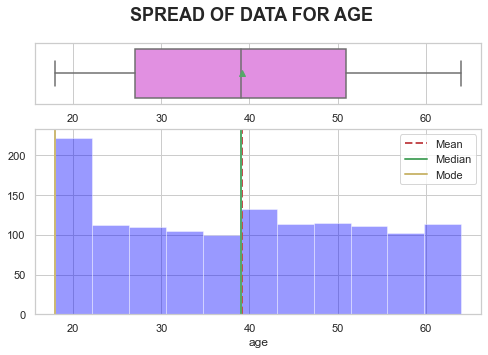

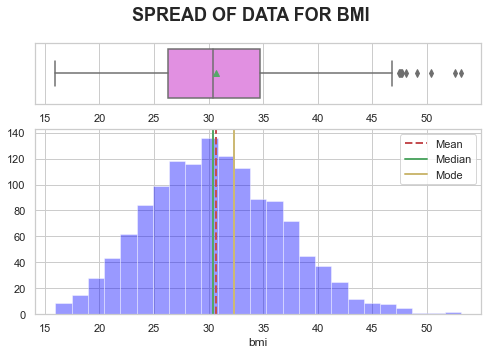

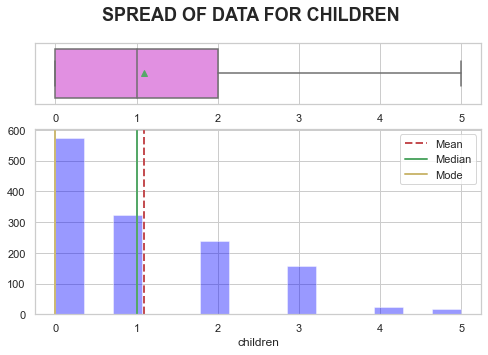

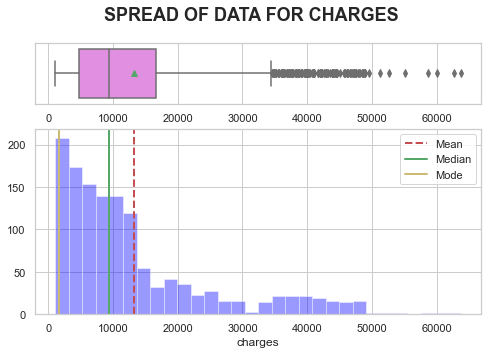

In [11]:
#select all quantitative columns for checking the spread
list_col=  df.select_dtypes([np.number]).columns
for i in range(len(list_col)):
    dist_box(df[list_col[i]])

**Observations**

* Age of primary beneficary lies approximately between <span class="girk">20 - 65</span> . Average Age is aprrox. 40. Majority of customer are in range 18- 20's.

* Bmi is normally distrubuted and Average BMI of beneficiary is <span class="girk">30</span>.This BMI is outside the normal range of BMI.

* Most of the beneficary have no childrens.

* Charges distrubution is unimodal and is right skewed .<span class="girk">Average cost incured</span> to the insurance is <span class="girk">appro. 130000 and highest charge is 63770.</span>

In [12]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    total = len(feature) # length of the column
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        plot.annotate(percentage, (x, y), size = 12) # annotate the percentage

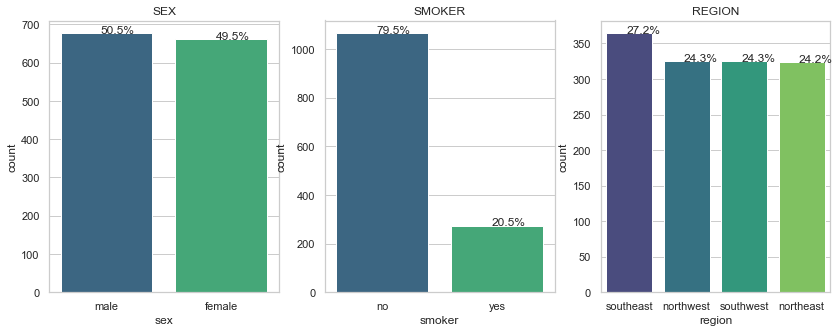

In [13]:
#get all category datatype 
list_col=  df.select_dtypes(['category']).columns
fig1, axes1 =plt.subplots(1,3,figsize=(14, 5))
for i in range(len(list_col)):
    order = df[list_col[i]].value_counts(ascending=False).index # to display bar in ascending order
    axis=sns.countplot(x=list_col[i], data=df , order=order,ax=axes1[i],palette='viridis').set(title=list_col[i].upper())
    bar_perc(axes1[i],df[list_col[i]])

**Observations**

* 50.5% of beneficiary are male and 49.5 % are female. Approximately same number of male and female beneficiary.
* 20.5% of beneficary are smokers.
* Beneficary are evenly distributed across regions with South East being the most populous one (~27%) with the rest of regions each containing around ~24%
* Most of the beneficiary don't have kid.

## Bivariate & Multivariate Analysis

**Correlations**
* Finally, let's take a look at the relationships between numeric features and other numeric features.
* Correlation is a value between -1 and 1 that represents how closely values for two separate features move in unison.
* Positive correlation means that as one feature increases, the other increases; eg. a child's age and her height.
* Negative correlation means that as one feature increases, the other decreases; eg. hours spent studying and number of parties attended.
* Correlations near -1 or 1 indicate a strong relationship.
* Those closer to 0 indicate a weak relationship.
* 0 indicates no relationship.

In [14]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


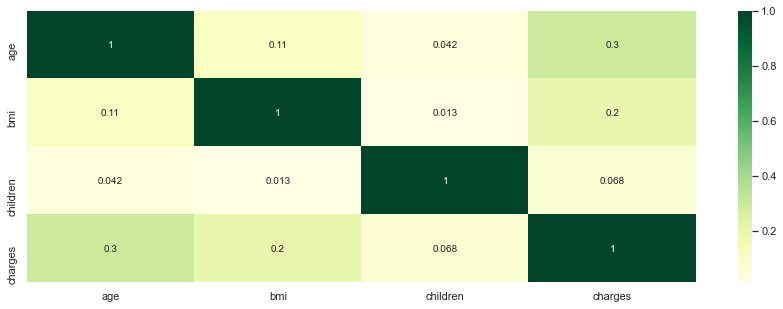

Index(['sex', 'smoker', 'region'], dtype='object')


In [15]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True ,cmap="YlGn")
plt.show()
print(df.select_dtypes(['category']).columns)

**Observation**

* There is very little significant correlation between charges &age and charges and bmi.

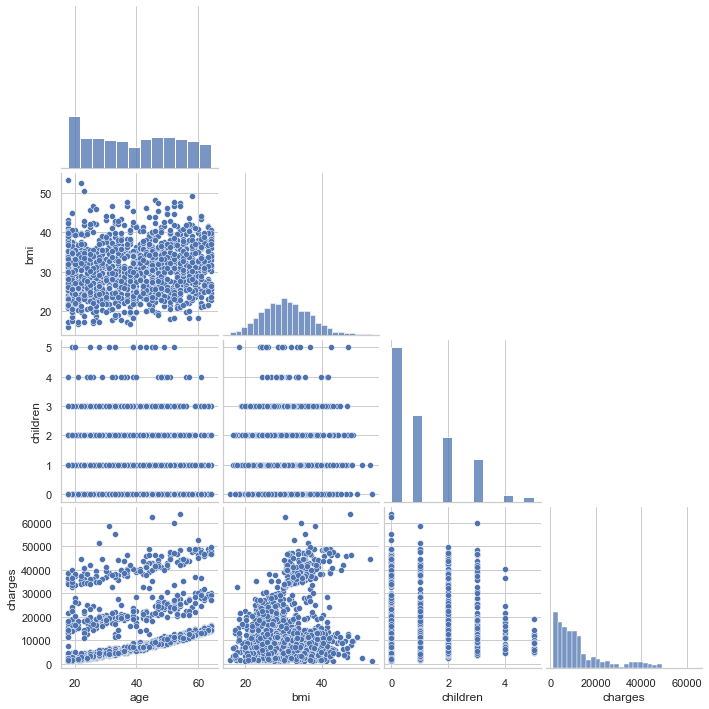

In [16]:
# Pairplot
sns.pairplot(data=df , corner=True);
plt.show()

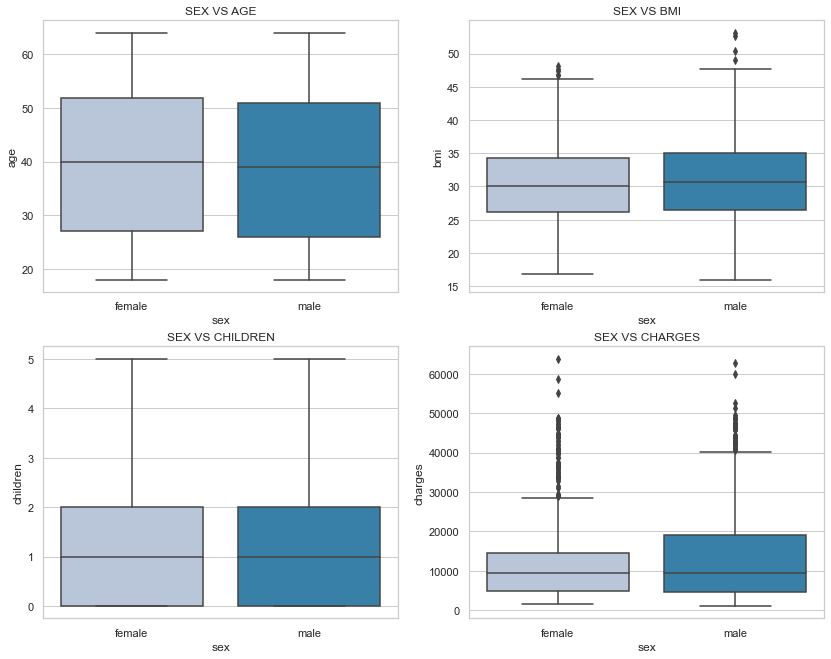

In [17]:
#Sex vs all numerical variable
fig1, axes1 =plt.subplots(2,2,figsize=(14, 11))
#select all quantitative columns for checking the spread
list_col=  df.select_dtypes([np.number]).columns
for i in range(len(list_col)):
    row=i//2
    col=i%2
    ax=axes1[row,col]
    sns.boxplot(y=df[list_col[i]],x=df['sex'],ax=ax,palette="PuBu", orient='v').set(title='SEX VS '+ list_col[i].upper())

**Observation**

* Avergae Age of female beneficiary is slightly higher than male beneficiary
* No of children both male and female beneficary have is same
* BMI of Male policy holder has many outliers and Average BMI of male is slightly higher than female
* Male policy holder has incure more charges to insurance compared to female policy holder. There are lot of outliers in female policy holder

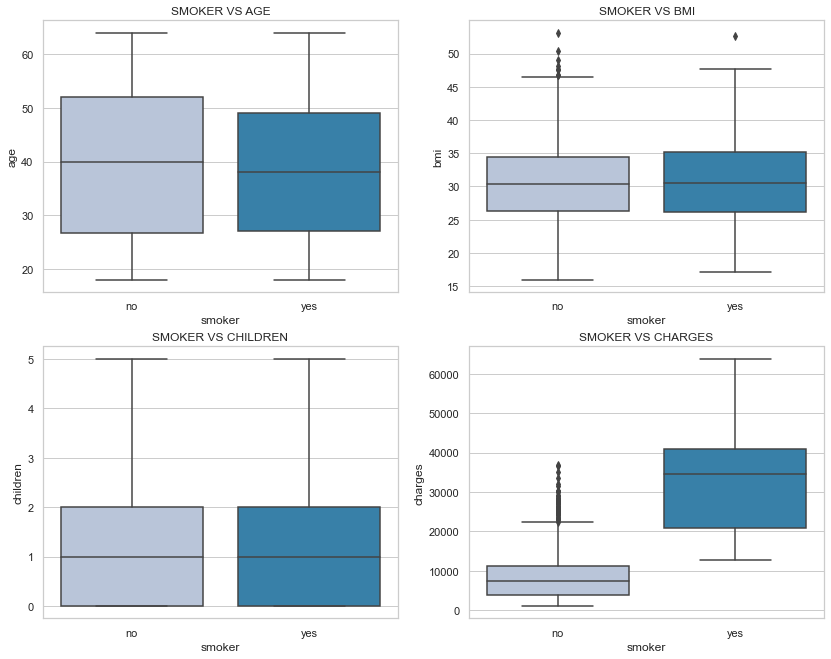

In [18]:
#smoker vs all numerical variables
fig1, axes1 =plt.subplots(2,2,figsize=(14, 11))
#select all quantitative columns for checking the spread
list_col=  df.select_dtypes([np.number]).columns
for i in range(len(list_col)):
    row=i//2
    col=i%2
    ax=axes1[row,col]
    sns.boxplot(y=df[list_col[i]],x=df['smoker'],ax=ax,palette="PuBu",orient='v').set(title='SMOKER VS '+ list_col[i].upper())

**Observation**

* Smoker have incured more cost to insurance than nonsmoker. There are outliers in nonsmoker , need to analyze.
* BMI of non smoker has lot of outliers.

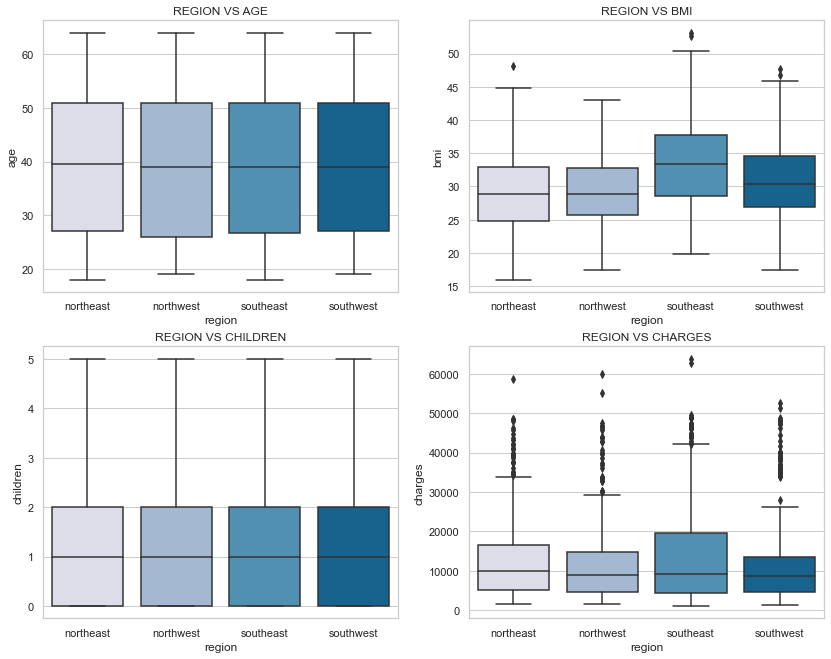

In [19]:
#region vs all numerical variables
fig1, axes1 =plt.subplots(2,2,figsize=(14, 11))
#select all quantitative columns for checking the spread
list_col=  df.select_dtypes([np.number]).columns
for i in range(len(list_col)):
    row=i//2
    col=i%2
    ax=axes1[row,col]
    sns.boxplot(y=df[list_col[i]],x=df['region'],ax=ax,palette="PuBu",orient='v').set(title='REGION VS '+ list_col[i].upper())

**Observations**

* Age and number of children across regions is almost same.
* Average Bmi of policy holder from southeast higher compared to other regions
* Charges incured because of policy holder from southeast is higher compared to othe regions
* There are lot of outliers on upper end in charges

[Text(0.5, 1.0, 'Smoker vs Charges')]

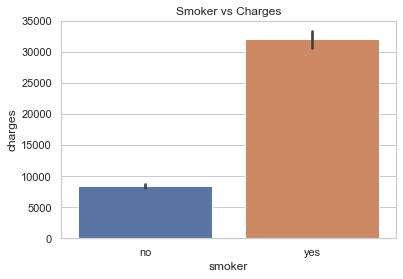

In [20]:
#smoker vs charges
sns.barplot(x=df.smoker,y=df.charges).set(title="Smoker vs Charges")

[Text(0.5, 1.0, 'Smoker vs Sex')]

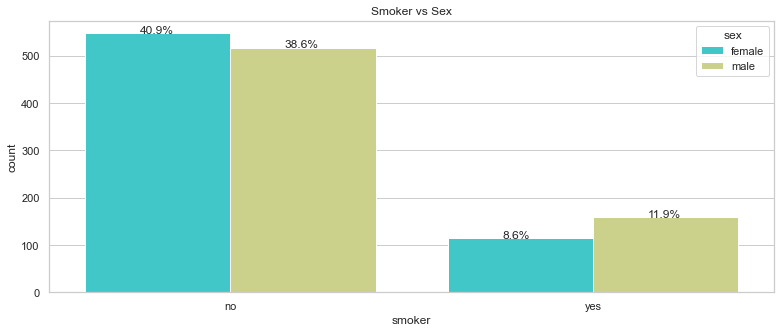

In [21]:
#smoker vs Sex
plt.figure(figsize=(13,5))
ax=sns.countplot(x='smoker',hue='sex',data=df,palette='rainbow')
bar_perc(ax,df['sex'])
ax.set(title="Smoker vs Sex")

[Text(0.5, 1.0, 'Smoker vs Region')]

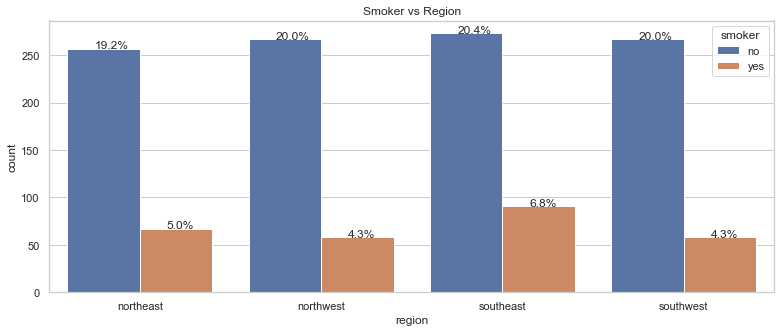

In [22]:
#region vs smoker
plt.figure(figsize=(13,5))
ax=sns.countplot(x='region',hue='smoker',data=df)
bar_perc(ax,df['smoker'])
ax.set(title="Smoker vs Region")

**Observation**

* There are more male smokers than female.
* Southeast region has more smokers
* Smoker have more costlier claims than nonsmoker.

[Text(0.5, 1.0, 'Sex vs Region')]

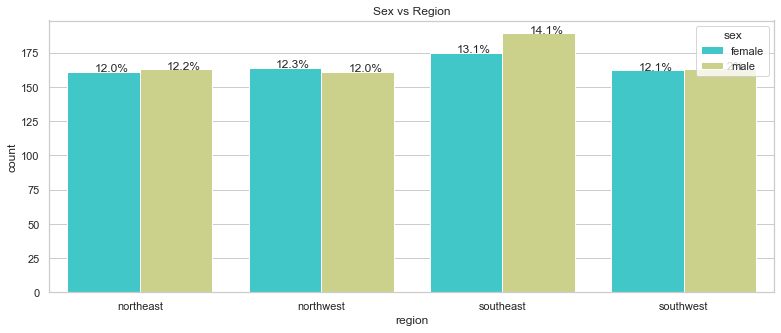

In [23]:
plt.figure(figsize=(13,5))
ax=sns.countplot(x='region',hue='sex',data=df,palette='rainbow')
bar_perc(ax,df['sex'])
ax.set(title="Sex vs Region")

**Observations**

There are more smokers in southeast region compared to other regions.

[Text(0.5, 1.0, 'Children vs Charges')]

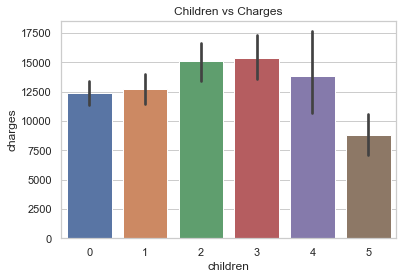

In [24]:
sns.barplot(x=df.children,y=df.charges).set(title="Children vs Charges")

People with 5 children, on average, has less medical expenditures compared to the other groups.

[Text(0.5, 1.0, 'Sex Vs Charges')]

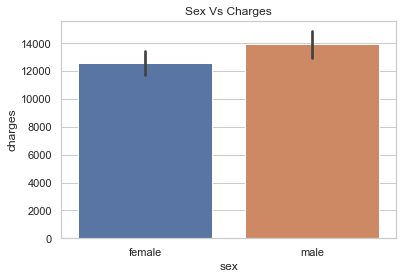

In [25]:
sns.barplot(x=df.sex,y=df.charges).set(title='Sex Vs Charges')

[Text(0.5, 1.0, 'Region Vs Charges')]

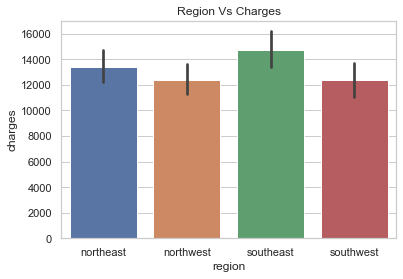

In [26]:
sns.barplot(x='region',y='charges',data=df).set(title='Region Vs Charges')

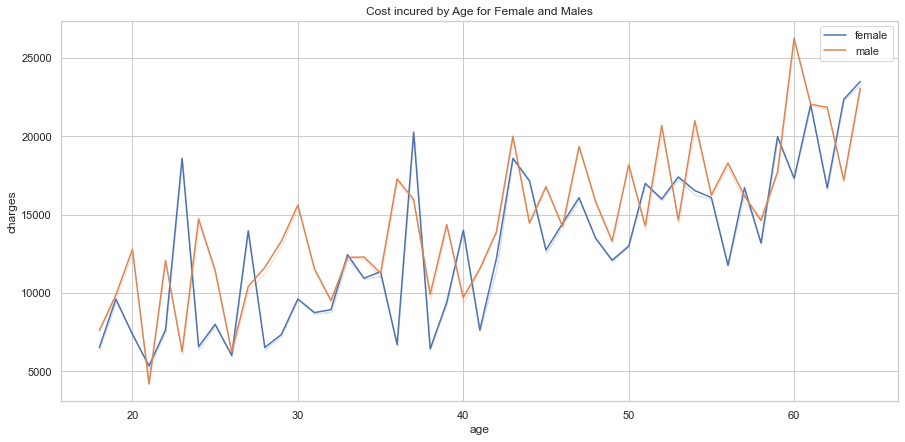

In [27]:
plt.figure(figsize=(15,7))
sns.lineplot(df["age"],df["charges"],hue=df["sex"],ci=0).set(title= 'Cost incured by Age for Female and Males')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

**Observations**

* Charges incurred for males are more than charges incured for females
* With increasing age of policy holder charges incured are going high for both male and female.
* There some spikes for female at an approximate ages of 23,28,43.
* Most claims are from southeast regions.
* Males who smoke have most claims and have higher bills
* Number of claims made by female who dont smoke is more compared to female who smoke.

In [28]:
df.groupby(['region','sex','smoker']).mean()['charges'].unstack()

smoker                     no           yes
region    sex                              
northeast female  9640.426984  28032.046398
          male    8664.042222  30926.252583
northwest female  8786.998679  29670.824946
          male    8320.689321  30713.181419
southeast female  8440.205552  33034.820716
          male    7609.003587  36029.839367
southwest female  8234.091260  31687.988430
          male    7778.905534  32598.862854

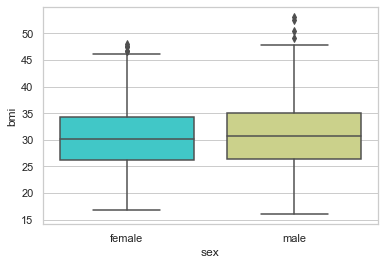

In [29]:
sns.boxplot(y="bmi", x="sex", data=df,palette='rainbow')
plt.show()

**General Information**
* 30 is the bmi threshold for obesity and we all know that obesity plays a huge role in a person’s health.

## Conclusion based on EDA

* As expected , as the <span class="girk">age of the beneficiary increases ,the cost to insurance increases.</span>
* <span class="girk">Males who smoke have most claims and have higher bills.</span>
* Female who are nonsmoker also have more claims to nonsmoker males this may be because of child birth.
* Beneficiary with 2 or 3 dependent have billed higher compared to others people who have 5.This is unusual and may be because of uneven number of observations in each group. For example, no dependents group has 574 observations whereas five dependents group only has 18.
* Females with BMI more than 45 have billed higher to insurance.
* <span class="girk">Age, BMI and Smoking are important attributes which can cost insurance company more.</span>

# **Encoding the categorical features**

In [30]:
# encoding sex column
df.replace({'sex':{'male':1,'female':0}}, inplace=True)

3 # encoding 'smoker' column
df.replace({'smoker':{'yes':1,'no':0}}, inplace=True)

# encoding 'region' column
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


# **Machine Learning Models**

###  Train and Test Splits
Separate your dataframe into separate objects for the target variable (y) and the input features (X) and perform the train and test split

In [31]:
# Create separate object for target variable
y = df.charges
# Create separate object for input features
X = df.drop('charges', axis=1)

Now we will split our dataset into training set and testing set using sklearn train_test_split().We use 80% of the split data as training data and 20% of it as test data.

In [32]:
# Split X and y into train and test sets: 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

#random_state = If we don’t set random_state, every time we run your code again, 
#it will generate a different test set. Over time, you (or your machine learning algorithm) 
#will be able to see the dataset, which you want to avoid.

Let's confirm we have the right number of observations in each subset.

In [33]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1070, 6) (268, 6) (1070,) (268,)


#  **Linear Regression**

In [34]:
# loading the Linear Regression model
model = LinearRegression()

In [36]:
model.fit(X_train,y_train)

LinearRegression()

In [37]:
# Model Evaluation
# prediction on training data
y_train_pred =model.predict(X_train)

In [38]:
## prediction on test data
y_pred = model.predict(X_test)

In [39]:
print("Train Results for Linear Regression:")
LR_train_RMSE = sqrt(mse(y_train, y_train_pred))
LR_train_R_squared = r2_score(y_train, y_train_pred)
LR_train_MSE = mse(y_train,y_train_pred)
LR_train_MAE = mae(y_train, y_train_pred)

print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train, y_train_pred)))
print("R-squared: ", r2_score(y_train, y_train_pred))
print("Mean Squared Error: ",mse(y_train,y_train_pred))
print("Mean Absolute Error: ", mae(y_train, y_train_pred))

Train Results for Linear Regression:
*******************************
Root mean squared error:  6014.563860089281
R-squared:  0.751505643411174
Mean Squared Error:  36174978.42709207
Mean Absolute Error:  4150.500304883777


In [40]:
print("Test Results for Linear Regression:")
LR_test_RMSE = sqrt(mse(y_test, y_pred))
LR_test_R_squared = r2_score(y_test, y_pred)
LR_test_MSE = mse(y_test,y_pred)
LR_test_MAE = mae(y_test, y_pred)
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Squared Error: ",mse(y_test,y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Linear Regression:
*******************************
Root mean squared error:  6191.690842285236
R-squared:  0.7447273869684076
Mean Squared Error:  38337035.48643885
Mean Absolute Error:  4267.213826730733


## Feature Importance

The features in order of importance are:
--------------------------------------------------
smoker
children
bmi
age
region
sex
--------------------------------------------------


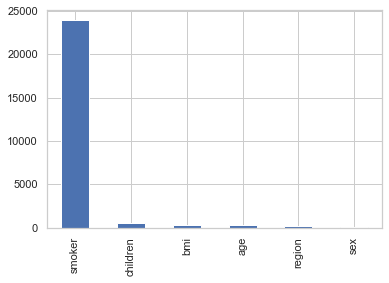

In [41]:
# get importance
importance = model.coef_
# summarize feature importance
indices = np.argsort(-abs(importance))
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)
print(50*'-')
feat_importances = pd.Series(abs(model.coef_), index=X.columns)
feat_importances.nlargest(6).plot(kind='bar')
plt.show()

# **Regularized Linear Models**

 **1. Ridge Regression**<br>
 **2. Lasso Regression**

## **Ridge Regression**

In [42]:
tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model = GridSearchCV(Ridge(), tuned_params, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [43]:
model.best_estimator_

Ridge(alpha=0.0001)

In [44]:
# Model Evaluation
# prediction on training data
y_train_pred = model.predict(X_train)

In [45]:
## prediction on test data
y_pred = model.predict(X_test)

In [46]:
print("Train Results for Ridge Regression:")
RiR_train_RMSE = sqrt(mse(y_train, y_train_pred))
RiR_train_R_squared = r2_score(y_train, y_train_pred)
RiR_train_MSE = mse(y_train,y_train_pred)
RiR_train_MAE = mae(y_train, y_train_pred)
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train, y_train_pred)))
print("R-squared: ", r2_score(y_train, y_train_pred))
print("Mean Squared Error: ",mse(y_train,y_train_pred))
print("Mean Absolute Error: ", mae(y_train, y_train_pred))

Train Results for Ridge Regression:
*******************************
Root mean squared error:  6014.5638600918555
R-squared:  0.7515056434109613
Mean Squared Error:  36174978.42712304
Mean Absolute Error:  4150.501420402301


In [47]:
print("Test Results for Ridge Regression:")
RiR_test_RMSE = sqrt(mse(y_test, y_pred))
RiR_test_R_squared = r2_score(y_test, y_pred)
RiR_test_MSE = mse(y_test,y_pred)
RiR_test_MAE = mae(y_test, y_pred)
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Squared Error: ",mse(y_test,y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Ridge Regression:
*******************************
Root mean squared error:  6191.690728092813
R-squared:  0.7447273963843164
Mean Squared Error:  38337034.0723505
Mean Absolute Error:  4267.21443963997


### Feature Importance

In [48]:
## Building the model again with the best hyperparameters
model = Ridge(alpha=0.0001)
model.fit(X_train, y_train)

Ridge(alpha=0.0001)

The features in order of importance are:
--------------------------------------------------
smoker
children
bmi
age
region
sex
--------------------------------------------------


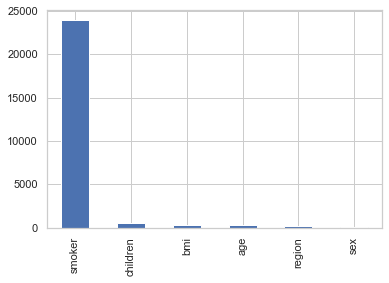

In [49]:
indices = np.argsort(-abs(model.coef_))
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)
print(50*'-')
feat_importances = pd.Series(abs(model.coef_), index=X.columns)
feat_importances.nlargest(6).plot(kind='bar')
plt.show()

## **Lasso Regression**

In [50]:
tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model = GridSearchCV(Lasso(), tuned_params, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [51]:
model.best_estimator_

Lasso(alpha=0.0001)

In [52]:
# Model Evaluation
# prediction on training data
y_train_pred = model.predict(X_train)

In [53]:
## prediction on test data
y_pred = model.predict(X_test)

In [54]:
print("Train Results for Lasso Regression:")
LaR_train_RMSE = sqrt(mse(y_train, y_train_pred))
LaR_train_R_squared = r2_score(y_train, y_train_pred)
LaR_train_MSE = mse(y_train,y_train_pred)
LaR_train_MAE = mae(y_train, y_train_pred)
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train, y_train_pred)))
print("R-squared: ", r2_score(y_train, y_train_pred))
print("Mean Squared Error: ",mse(y_train,y_train_pred))
print("Mean Absolute Error: ", mae(y_train, y_train_pred))

Train Results for Lasso Regression:
*******************************
Root mean squared error:  6014.563860089291
R-squared:  0.7515056434111731
Mean Squared Error:  36174978.427092195
Mean Absolute Error:  4150.500351881187


In [55]:
print("Test Results for Lasso Regression:")
LaR_test_RMSE = sqrt(mse(y_test, y_pred))
LaR_test_R_squared = r2_score(y_test, y_pred)
LaR_test_MSE = mse(y_test,y_pred)
LaR_test_MAE = mae(y_test, y_pred)
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Squared Error: ",mse(y_test,y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Lasso Regression:
*******************************
Root mean squared error:  6191.69084563368
R-squared:  0.7447273866923065
Mean Squared Error:  38337035.527903914
Mean Absolute Error:  4267.213821614802


### Feature Importance

In [56]:
## Building the model again with the best hyperparameters
model = Lasso(alpha=0.0001)
model.fit(X_train, y_train)

Lasso(alpha=0.0001)

The features in order of importance are:
--------------------------------------------------
smoker
children
bmi
age
region
sex
--------------------------------------------------


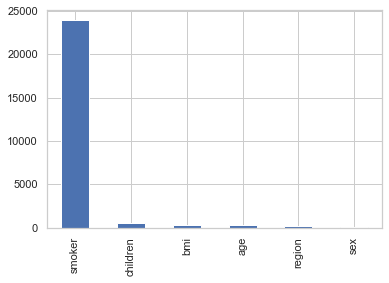

In [57]:
indices = np.argsort(-abs(model.coef_))
print("The features in order of importance are:")
print(50*'-')
# summarize feature importance
for feature in X.columns[indices]:
    print(feature)
print(50*'-')
feat_importances = pd.Series(abs(model.coef_), index=X.columns)
feat_importances.nlargest(6).plot(kind='bar')
plt.show()

# **Support Vector Regression**

In [58]:
tuned_params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model = GridSearchCV(SVR(), tuned_params, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000, 100000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [59]:
model.best_estimator_

SVR(C=100000, gamma=0.01)

In [60]:
## Building the model again with the best hyperparameters
model = SVR(C=100000, gamma=0.01)
model.fit(X_train, y_train)

SVR(C=100000, gamma=0.01)

In [61]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [62]:
## Predict Test results
y_pred = model.predict(X_test)

In [63]:
print("Train Results for Support Vector Regression:")
svr_train_RMSE = sqrt(mse(y_train, y_train_pred))
svr_train_R_squared = r2_score(y_train, y_train_pred)
svr_train_MSE = mse(y_train,y_train_pred)
svr_train_MAE = mae(y_train, y_train_pred)
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train, y_train_pred)))
print("R-squared: ", r2_score(y_train, y_train_pred))
print("Mean Squared Error: ",mse(y_train,y_train_pred))
print("Mean Absolute Error: ", mae(y_train, y_train_pred))

Train Results for Support Vector Regression:
*******************************
Root mean squared error:  5123.254598971791
R-squared:  0.8196981733849031
Mean Squared Error:  26247737.68588561
Mean Absolute Error:  1984.2481764419879


In [64]:
print("Test Results for Support Vector Regression:")
svr_test_RMSE = sqrt(mse(y_test, y_pred))
svr_test_R_squared = r2_score(y_test, y_pred)
svr_test_MSE = mse(y_test,y_pred)
svr_test_MAE = mae(y_test, y_pred)
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Squared Error: ",mse(y_test,y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Support Vector Regression:
*******************************
Root mean squared error:  5314.104116382143
R-squared:  0.8119619169246342
Mean Squared Error:  28239702.559749633
Mean Absolute Error:  2111.733710288447


# **XGBoost Regression**

In [65]:
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
model = RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          predictor=None, random_state=None,
                                          reg_alpha=None, reg_lambda=None,
                                       

In [66]:
model.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=300, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=0.1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [67]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [68]:
## Predict Test results
y_pred = model.predict(X_test)

In [69]:
print("Train Results for XGBoost Regression:")
XG_train_RMSE = sqrt(mse(y_train, y_train_pred))
XG_train_R_squared = r2_score(y_train, y_train_pred)
XG_train_MSE = mse(y_train,y_train_pred)
XG_train_MAE = mae(y_train, y_train_pred)
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train, y_train_pred)))
print("R-squared: ", r2_score(y_train, y_train_pred))
print("Mean Squared Error: ",mse(y_train,y_train_pred))
print("Mean Absolute Error: ", mae(y_train, y_train_pred))

Train Results for XGBoost Regression:
*******************************
Root mean squared error:  4142.488102941724
R-squared:  0.8821225346211242
Mean Squared Error:  17160207.683013722
Mean Absolute Error:  2100.3050267299723


In [70]:
print("Test Results for XGBoost Regression:")
XG_test_RMSE = sqrt(mse(y_test, y_pred))
XG_test_R_squared = r2_score(y_test, y_pred)
XG_test_MSE = mse(y_test,y_pred)
XG_test_MAE = mae(y_test, y_pred)
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Squared Error: ",mse(y_test,y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for XGBoost Regression:
*******************************
Root mean squared error:  4511.7188600672125
R-squared:  0.8644592900506106
Mean Squared Error:  20355607.072286185
Mean Absolute Error:  2231.8050348440415


## Feature Importance

In [71]:
## Building the model again with the best hyperparameters
model = XGBRegressor(max_depth=4,learning_rate=0.01,n_estimators=300, reg_lambda=0.1)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=300, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=0.1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [72]:
## Function to include figsize parameter
def my_plot_importance(booster, figsize, **kwargs): 
    from matplotlib import pyplot as plt
    from xgboost import plot_importance
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax, **kwargs)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

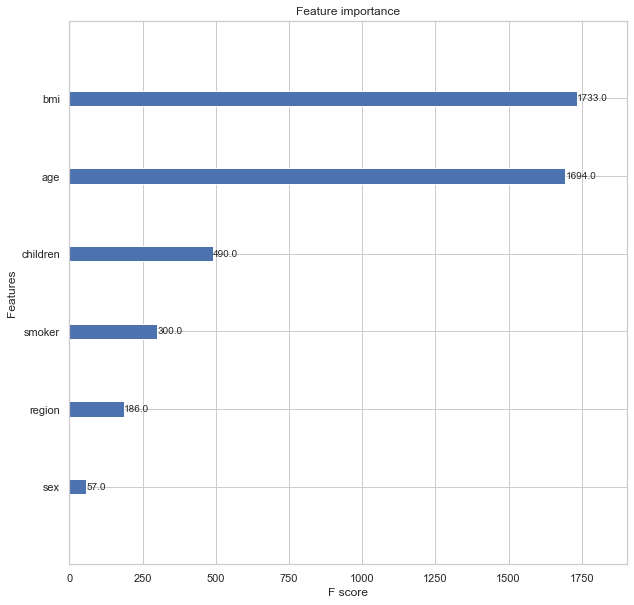

In [73]:
my_plot_importance(model, (10,10))

# **Descision Tree Regression**

In [74]:
tuned_params = {'min_samples_split': [2, 3, 4, 5, 7], 'min_samples_leaf': [1, 2, 3, 4, 6], 'max_depth': [2, 3, 4, 5, 6, 7]}
model = RandomizedSearchCV(DecisionTreeRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3, 4, 6],
                                        'min_samples_split': [2, 3, 4, 5, 7]},
                   scoring='neg_mean_absolute_error')

In [75]:
model.best_estimator_

DecisionTreeRegressor(max_depth=6, min_samples_leaf=4)

In [76]:
# Model Evalution
# Prediction on training data
y_train_pred = model.predict(X_train)

In [77]:
# Prediction on testing data
y_pred = model.predict(X_test)

In [78]:
print("Train Results for Decision Tree Regression:")
DT_train_RMSE = sqrt(mse(y_train, y_train_pred))
DT_train_R_squared = r2_score(y_train, y_train_pred)
DT_train_MSE = mse(y_train,y_train_pred)
DT_train_MAE = mae(y_train, y_train_pred)
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train, y_train_pred)))
print("R-squared: ", r2_score(y_train, y_train_pred))
print("Mean Squared Error: ",mse(y_train,y_train_pred))
print("Mean Absolute Error: ", mae(y_train, y_train_pred))

Train Results for Decision Tree Regression:
*******************************
Root mean squared error:  3979.1079692153544
R-squared:  0.8912373711174841
Mean Squared Error:  15833300.23067314
Mean Absolute Error:  2195.7036591377087


In [79]:
print("Test Results for Decision Tree Regression:")
DT_test_RMSE = sqrt(mse(y_test, y_pred))
DT_test_R_squared = r2_score(y_test, y_pred)
DT_test_MSE = mse(y_test,y_pred)
DT_test_MAE = mae(y_test, y_pred)
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Squared Error: ",mse(y_test,y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Decision Tree Regression:
*******************************
Root mean squared error:  4518.225285761161
R-squared:  0.8640680770889149
Mean Squared Error:  20414359.732891522
Mean Absolute Error:  2454.613714185456


## Feature Importance

In [80]:
## Building the model again with the best hyperparameter
model = DecisionTreeRegressor(max_depth=6, min_samples_leaf=4)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=4)

The features in order of importance are:
--------------------------------------------------
smoker
bmi
age
children
region
sex
--------------------------------------------------


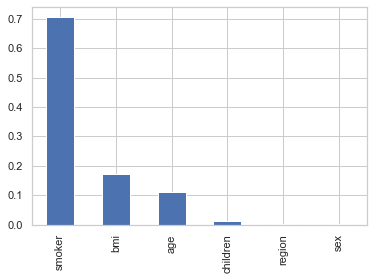

In [81]:
indices = np.argsort(-abs(model.feature_importances_))
print("The features in order of importance are:")
print(50*'-')
# summarize feature importance
for feature in X.columns[indices]:
    print(feature)
print(50*'-')
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='bar')
plt.show()

# **Random Forest Regression**

In [110]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
model = GridSearchCV(RandomForestRegressor(), tuned_params, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='neg_mean_absolute_error')

In [111]:
model.best_estimator_

RandomForestRegressor(min_samples_leaf=4, min_samples_split=10,
                      n_estimators=200)

In [112]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [113]:
## Predict Test results
y_pred = model.predict(X_test)

In [114]:
print("Train Results for Random Forest Regression:")
RFR_train_RMSE = sqrt(mse(y_train, y_train_pred))
RFR_train_R_squared = r2_score(y_train, y_train_pred)
RFR_train_MSE = mse(y_train,y_train_pred)
RFR_train_MAE = mae(y_train, y_train_pred)
print("*************************************************************")
print("Root mean squared error: ", sqrt(mse(y_train, y_train_pred)))
print("R-squared: ", r2_score(y_train, y_train_pred)*100)
print("Mean Squared Error: ",mse(y_train,y_train_pred))
print("Mean Absolute Error: ", mae(y_train, y_train_pred))

Train Results for Random Forest Regression:
*************************************************************
Root mean squared error:  3545.34257332937
R-squared:  91.36574917018913
Mean Squared Error:  12569453.962261721
Mean Absolute Error:  1924.6052736176516


In [115]:
print("Test Results for Random Forest Regression:")
RFR_test_RMSE = sqrt(mse(y_test, y_pred))
RFR_test_R_squared = r2_score(y_test, y_pred)
RFR_test_MSE = mse(y_test,y_pred)
RFR_test_MAE = mae(y_test, y_pred)
print("********************************************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred)*100)
print("Mean Squared Error: ",mse(y_test,y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Random Forest Regression:
********************************************************
Root mean squared error:  4495.453460216242
R-squared:  86.54348161937757
Mean Squared Error:  20209101.81297018
Mean Absolute Error:  2430.586926666782


## Feature Importance

In [116]:
## Building the model again with the best hyperparameter
model = RandomForestRegressor(min_samples_leaf=4, min_samples_split=10,n_estimators=200)
model.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=4, min_samples_split=10,
                      n_estimators=200)

The features in order of importance are:
--------------------------------------------------
smoker
bmi
age
children
region
sex
--------------------------------------------------


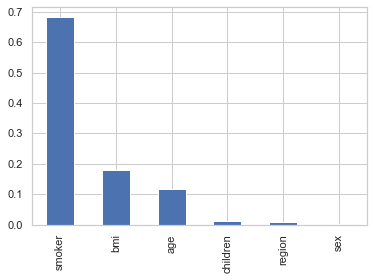

In [117]:
indices = np.argsort(-abs(model.feature_importances_))
print("The features in order of importance are:")
print(50*'-')
# summarize feature importance
for feature in X.columns[indices]:
    print(feature)
print(50*'-')
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='bar')
plt.show()

# **AdaBoost Regressor**

In [118]:
model = AdaBoostRegressor(n_estimators = 100)
model.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=100)

In [119]:
# Model Evalution
# Prediction on training data
y_train_pred = model.predict(X_train)

In [120]:
# Prediction on testing data
y_pred = model.predict(X_test)

In [121]:
print("Train Results for AdaBoost Regression:")
AB_train_RMSE = sqrt(mse(y_train, y_train_pred))
AB_train_R_squared = r2_score(y_train, y_train_pred)
AB_train_MSE = mse(y_train,y_train_pred)
AB_train_MAE = mae(y_train, y_train_pred)
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train, y_train_pred)))
print("R-squared: ", r2_score(y_train, y_train_pred))
print("Mean Squared Error: ",mse(y_train,y_train_pred))
print("Mean Absolute Error: ", mae(y_train, y_train_pred))

Train Results for AdaBoost Regression:
*******************************
Root mean squared error:  5024.494206590383
R-squared:  0.8265824888704079
Mean Squared Error:  25245542.03206033
Mean Absolute Error:  4091.5401021676084


In [122]:
print("Test Results for AdaBoost Regression:")
AB_test_RMSE = sqrt(mse(y_test, y_pred))
AB_test_R_squared = r2_score(y_test, y_pred)
AB_test_MSE = mse(y_test,y_pred)
AB_test_MAE = mae(y_test, y_pred)
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Squared Error: ",mse(y_test,y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for AdaBoost Regression:
*******************************
Root mean squared error:  5282.454871498334
R-squared:  0.8141950464304382
Mean Squared Error:  27904329.469416477
Mean Absolute Error:  4212.414303322896


As can be seen that the model performance has not imporoved on the testing data.

Now let's check the feature importance of all the columns.

## Feature Importance

The features in order of importance are:
--------------------------------------------------
smoker
bmi
age
children
sex
region
--------------------------------------------------


Text(0.5, 1.0, 'Feature Importances of AdaBoost Regressor Model')

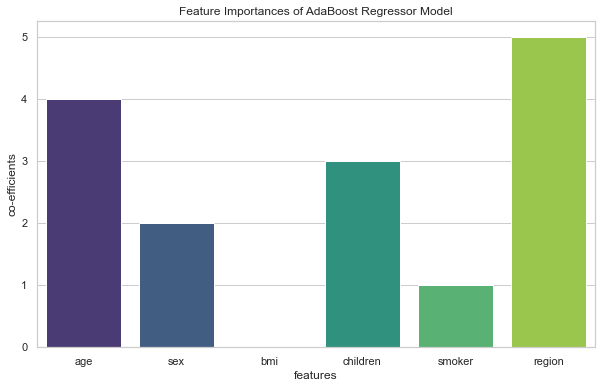

In [123]:
indices = np.argsort(-abs(model.feature_importances_))
print("The features in order of importance are:")
print(50*'-')
# summarize feature importance
for feature in X.columns[indices]:
    print(feature)
print(50*'-')

coef = pd.DataFrame(indices)
coef['features'] = X_train.columns

plt.figure(figsize = (10, 6))
sns.barplot(coef['features'], coef[0], palette = 'viridis')

plt.ylabel('co-efficients')
plt.xlabel('features')
plt.title('Feature Importances of AdaBoost Regressor Model')

# **Compairing Models**

In [124]:
def compairing_table():
    models = pd.DataFrame({
        'Model': [ 'Linear Regression', 'Ridge Regression','Lasso Regression','Support Vector Regression','XGBoost Regression','Decision Tree Regression','Random Forest Regression','AdaBoost Regression'],
        'Train RMSE': [LR_train_RMSE ,RiR_train_RMSE,LaR_train_RMSE,svr_train_RMSE,XG_train_RMSE,DT_train_RMSE,RFR_train_RMSE,AB_train_RMSE],
        'Test RMSE': [LR_test_RMSE ,RiR_test_RMSE,LaR_test_RMSE,svr_test_RMSE,XG_test_RMSE,DT_test_RMSE,RFR_test_RMSE,AB_test_RMSE],
        'Train MAE':[LR_train_MAE ,RiR_train_MAE,LaR_train_MAE,svr_train_MAE,XG_train_MAE,DT_train_MAE,RFR_train_MAE,AB_train_MAE],
        'Test MAE' :[LR_test_MAE ,RiR_test_MAE,LaR_test_MAE,svr_test_MAE,XG_test_MAE,DT_test_MAE,RFR_test_MAE,AB_test_MAE],
        'Train R2':[LR_train_R_squared,RiR_train_R_squared,LaR_train_R_squared,svr_train_R_squared,XG_train_R_squared,DT_train_R_squared,RFR_train_R_squared,AB_train_R_squared],
        'Test R2':[LR_test_R_squared ,RiR_test_R_squared,LaR_test_R_squared,svr_test_R_squared,XG_test_R_squared,DT_test_R_squared,RFR_test_R_squared,AB_test_R_squared]})
    return tabulate(models, headers='keys', showindex=True, tablefmt='fancy_grid',colalign='center')

In [125]:
print(compairing_table())

╒════╤═══════════════════════════╤══════════════╤═════════════╤═════════════╤════════════╤════════════╤═══════════╕
│    │                     Model │   Train RMSE │   Test RMSE │   Train MAE │   Test MAE │   Train R2 │   Test R2 │
╞════╪═══════════════════════════╪══════════════╪═════════════╪═════════════╪════════════╪════════════╪═══════════╡
│ 0  │ Linear Regression         │ 6014.56      │ 6191.69     │ 4150.5      │ 4267.21    │   0.751506 │  0.744727 │
├────┼───────────────────────────┼──────────────┼─────────────┼─────────────┼────────────┼────────────┼───────────┤
│ 1  │ Ridge Regression          │ 6014.56      │ 6191.69     │ 4150.5      │ 4267.21    │   0.751506 │  0.744727 │
├────┼───────────────────────────┼──────────────┼─────────────┼─────────────┼────────────┼────────────┼───────────┤
│ 2  │ Lasso Regression          │ 6014.56      │ 6191.69     │ 4150.5      │ 4267.21    │   0.751506 │  0.744727 │
├────┼───────────────────────────┼──────────────┼─────────────┼─────────

**From the above table, RMSE, R-squared, MAE for <span class="mark">Random Forest Regressor is better</span>(i.e RMSE and MAE is least and R-squared is more) <span class="mark">than other models so Random Forest is the winning Model.</span>**

In [126]:
modellists = []

modellists.append(['Linear Regressor', round(LR_train_R_squared * 100), round(LR_test_R_squared * 100)])
modellists.append(['Ridge Regressor', round(RiR_train_R_squared* 100), round(RiR_test_R_squared * 100)])
modellists.append(['Lasso Regressor', round(LaR_train_R_squared* 100), round(LaR_test_R_squared * 100)])
modellists.append(['XGBoost Regression', round(XG_train_R_squared * 100), round(XG_test_R_squared * 100)])
modellists.append(['Decision Tree Regressor', round(DT_train_R_squared* 100), round(DT_test_R_squared * 100)])
modellists.append(['AdaBoost Regressor', round(AB_train_R_squared * 100), round(AB_test_R_squared * 100)])
modellists.append(['Support Vector Regression', round(svr_train_R_squared * 100), round(svr_test_R_squared * 100)])
modellists.append(['Random Forest Regression', round(RFR_train_R_squared * 100), round(RFR_test_R_squared * 100)])

mdl_df = pd.DataFrame(modellists, columns = ['Model', 'R2 Score of Training Data', 'R2 Score of Testing Data'])
mdl_df

,Model,R2 Score of Training Data,R2 Score of Testing Data
0,Linear Regressor,75,74
1,Ridge Regressor,75,74
2,Lasso Regressor,75,74
3,XGBoost Regression,88,86
4,Decision Tree Regressor,89,86
5,AdaBoost Regressor,83,81
6,Support Vector Regression,82,81
7,Random Forest Regression,91,87


Text(0.5, 1.0, 'Comparison of Regression Models')

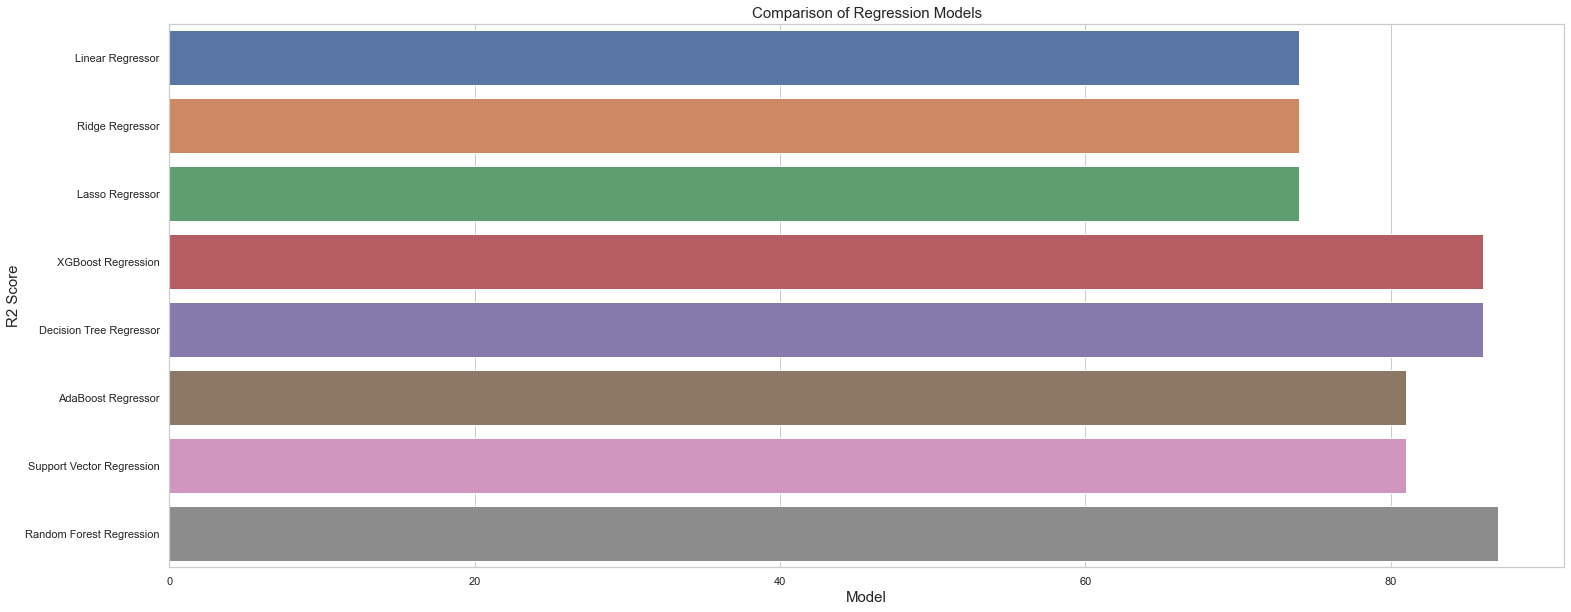

In [127]:
plt.figure(figsize = (25, 10))
sns.barplot(y = mdl_df['Model'], x = mdl_df['R2 Score of Testing Data'], data = mdl_df)
plt.xlabel('Model', fontsize = 15)
plt.ylabel('R2 Score', fontsize = 15)
plt.title('Comparison of Regression Models', fontsize = 15)

Random Forest seems to do well in the scenario.
**It is seen that Random Forest Regressor gives a R2 score of <span class="girk">87%</span> on the test data which is consistent with the scores provided on the training dataset.**

**Conclusion**:-
- In this project, regression models are evaluated for individual health insurance data. The health insurance data was used to develop the regression models, and the predicted premiums from these models were compared with actual premiums to compare the accuracies of these models. It has been found that **<span class="girk">Random Forest Regression</span>** model is the best performing model.

- Various factors were used and their effect on predicted amount was examined. It was observed that a persons <span class="girk">age,bmi and smoking</span> status affects the prediction most in every algorithm applied.

- The effect of various independent variables on the charges(target column) was also checked. The attributes also in combination were checked for better accuracy results.

- Insurance cost prediction focuses on persons own health rather than other companys insurance terms and conditions.

# **Save the winning model to disk**

In [129]:
win_model = RandomForestRegressor(min_samples_leaf=4, min_samples_split=10,n_estimators=200)
win_model.fit(X,y)
joblib.dump(win_model,'Win_RFR_Health_Insurance_1')

['Win_RFR_Health_Insurance_1']